# Industry 4.0 의 중심, AI - ML&DL

<div align='right'><font size=2 color='gray'>Machine Learning & Deep Learning with TensorFlow @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# Sect11. CNN (Convolutional Newural Network)

### 0. CNN Basics

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

C:\Python\Anaconda3-50\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(1, 2, 2, 1)


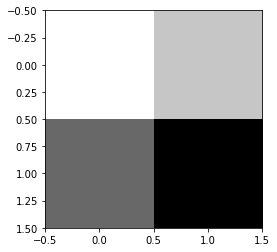

In [2]:
sess = tf.InteractiveSession()
# image = np.array([[[[1],[2]],
#                    [[3],[4]]]], dtype=np.float32)
image = np.array(
    [
        [
            [
                [1],[2]
            ],    
            [
                [3],[4]
            ]
        ]
    ], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(2,2), cmap='Greys')

In [3]:
image.reshape(2,2)

array([[1., 2.],
       [3., 4.]], dtype=float32)

<hr>
``` python
Signature: plt.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=None, filternorm=1, filterrad=4.0, imlim=None, resample=None, url=None, hold=None, data=None, **kwargs)
Docstring:
Display an image on the axes.

Parameters
-----------
X : array_like, shape (n, m) or (n, m, 3) or (n, m, 4)
    Display the image in `X` to current axes. 
    - MxN -- luminance (grayscale, float array only)
    - MxNx3 -- RGB (float or uint8 array)
    - MxNx4 -- RGBA (float or uint8 array)
cmap : `~matplotlib.colors.Colormap`, optional, default: None
    If None, default to rc `image.cmap` value. `cmap` is ignored when
    `X` has RGB(A) information

```

### Choosing Colormaps in matplotlib 
> 참조 : https://matplotlib.org/users/colormaps.html
![Graph](./images/lab11_colormaps.png)

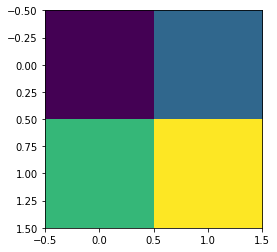

In [4]:
plt.imshow(image.reshape(2,2))

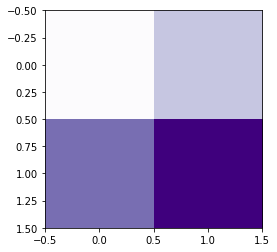

In [5]:
plt.imshow(image.reshape(2,2), cmap='Purples')

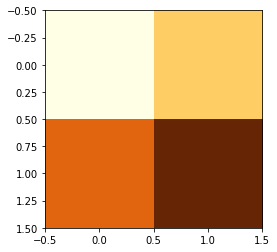

In [6]:
plt.imshow(image.reshape(2,2), cmap='YlOrBr')

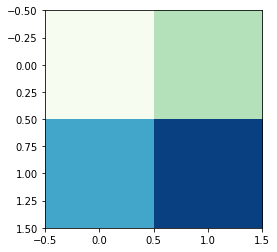

In [7]:
plt.imshow(image.reshape(2,2), cmap='GnBu')

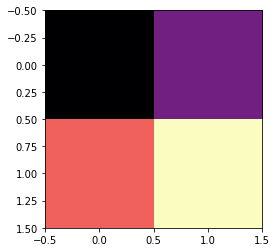

In [8]:
plt.imshow(image.reshape(2,2), cmap='magma')

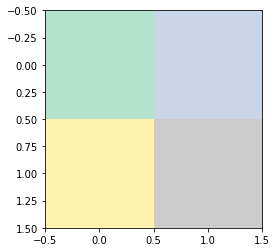

In [9]:
plt.imshow(image.reshape(2,2), cmap='Pastel2')

(1, 3, 3, 1)


C:\Python\Anaconda3-50\lib\site-packages\tensorflow\python\client\session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


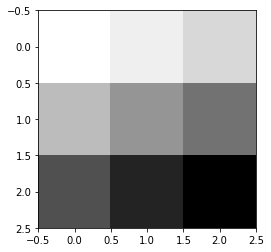

In [10]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]
                  ]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

In [11]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
type(a), a

(numpy.ndarray, array([1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [12]:
b = np.arange(1, 10)
type(b), b

(numpy.ndarray, array([1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [13]:
c = np.array(b[0:], dtype=np.float32)
type(c), c

(numpy.ndarray, array([1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32))

In [14]:
d = c.reshape(3,3)
type(d), d

(numpy.ndarray, array([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=float32))

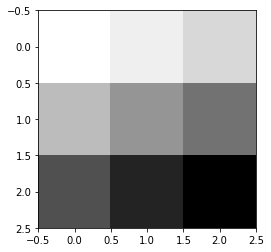

In [15]:
plt.imshow(d, cmap='Greys')

In [16]:
image = np.array(np.arange(1,10), dtype=np.float32)

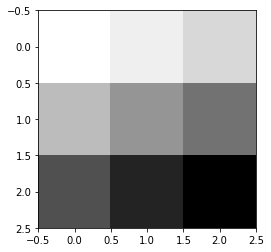

In [17]:
plt.imshow(image.reshape(3,3), cmap='Greys')

In [18]:
image = np.array(np.arange(1,4*4+1), dtype=np.float32)

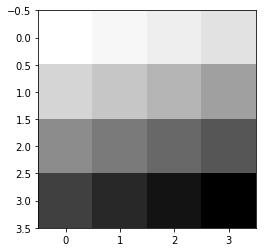

In [19]:
plt.imshow(image.reshape(4,4), cmap='Greys')

In [20]:
def showImage(rect=2, cmap='Greys'):
    image = np.arange(1, rect**2+1)
    image = np.array(image[:], dtype=np.float32)
    plt.imshow(image.reshape(rect,rect), cmap=cmap)


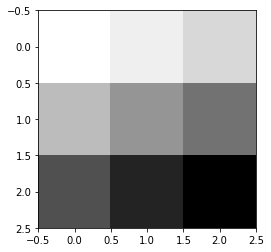

In [21]:
showImage(3)

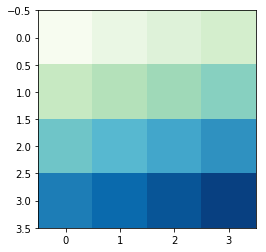

In [22]:
showImage(4, 'GnBu')

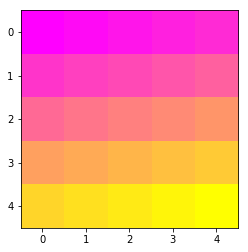

In [23]:
showImage(5, 'spring')

## Conv Layer

weight.shape = 2 filters (1 , 1 , 1)
![image](https://cloud.githubusercontent.com/assets/901975/23337561/56236b68-fc2d-11e6-956e-bc24325a824d.png)


convolution
![image](https://cloud.githubusercontent.com/assets/901975/23340105/a7ba8040-fc6b-11e6-8bc7-aba9f4cf7b78.png)
(TensorFlow For Machine Intelligence: A hands-on introduction to learning algorithms 
by Sam Abrahams et al.)

In [24]:
image = np.array([[[[1],[2]],
                   [[3],[4]]
                  ]], dtype=np.float32)
image

array([[[[1.],
         [2.]],

        [[3.],
         [4.]]]], dtype=float32)

In [25]:
weight = tf.constant([[[[2., 0.5]]]])
weight

<tf.Tensor 'Const:0' shape=(1, 1, 1, 2) dtype=float32>

In [26]:
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d

<tf.Tensor 'Conv2D:0' shape=(1, 2, 2, 2) dtype=float32>

In [27]:
conv2d_img = conv2d.eval()
conv2d_img

array([[[[2. , 0.5],
         [4. , 1. ]],

        [[6. , 1.5],
         [8. , 2. ]]]], dtype=float32)

In [28]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
conv2d_img

array([[[[2. ],
         [4. ]],

        [[6. ],
         [8. ]]],


       [[[0.5],
         [1. ]],

        [[1.5],
         [2. ]]]], dtype=float32)

0 
 ------------------------------ 
 one_img: 
 [[[2.]
  [4.]]

 [[6.]
  [8.]]]

 one_img.reshape(2,2) : 
  [[2. 4.]
 [6. 8.]]
1 
 ------------------------------ 
 one_img: 
 [[[0.5]
  [1. ]]

 [[1.5]
  [2. ]]]

 one_img.reshape(2,2) : 
  [[0.5 1. ]
 [1.5 2. ]]


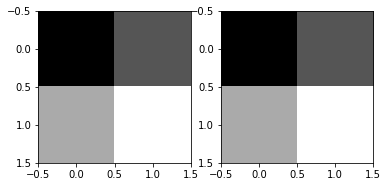

In [29]:
for i, one_img in enumerate(conv2d_img):
    print(i, '\n', '-'*30, '\n one_img: \n', one_img)
    print('\n one_img.reshape(2,2) : \n ', one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

In [30]:
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]
                  ]], dtype=np.float32)
print("image.shape ", image.shape)

image.shape  (1, 3, 3, 1)


In [31]:
weight = tf.constant([[[[1.,]],[[1.,]]],
                      [[[1.,]],[[1.,]]]])
print("weight.shape", weight.shape)

weight.shape (2, 2, 1, 1)


In [32]:
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)

conv2d_img.shape (1, 2, 2, 1)


[[12. 16.]
 [24. 28.]]


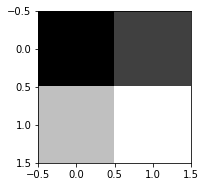

In [33]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

In [34]:
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)

conv2d_img.shape (1, 3, 3, 1)


[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


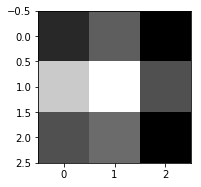

In [35]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

### 3 filters (2,2,1,3)
> 3개의 filter를 사용하면 image 하나로부터 3개의 image가 나온다.

In [36]:
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]
                  ]], dtype=np.float32)
print("image.shape ", image.shape)

image.shape  (1, 3, 3, 1)


In [37]:
weight = tf.constant([[[[1., 10., -1.]],[[1., 10., -1.]]],
                      [[[1., 10., -1.]],[[1., 10., -1.]]]])
print("weight.shape", weight.shape)

weight.shape (2, 2, 1, 3)


In [38]:
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)

conv2d_img.shape (1, 3, 3, 3)


[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


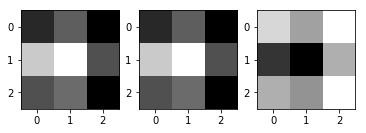

In [39]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

## MAX POOLING
> 풀링을 통해 샘플값을 가져온다.

![image](https://cloud.githubusercontent.com/assets/901975/23337676/bd154da2-fc30-11e6-888c-d86bc2206066.png)


![image](https://cloud.githubusercontent.com/assets/901975/23340355/a4bd3c08-fc6f-11e6-8a99-1e3bbbe86733.png)

In [40]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='VALID')
print(pool.shape)
print(pool.eval())

(1, 1, 1, 1)
[[[[4.]]]]


## SAME: Zero paddings

![image](https://cloud.githubusercontent.com/assets/901975/23340337/71b27652-fc6f-11e6-96ef-760998755f77.png)

In [41]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print('pool.shape :', pool.shape)
print('pool.eval() :\n', pool.eval())

pool.shape : (1, 2, 2, 1)
pool.eval() :
 [[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


## MNIST Convolution layer

In [42]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


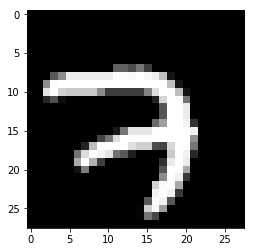

In [43]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

C:\Python\Anaconda3-50\lib\site-packages\tensorflow\python\client\session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


conv2d : Tensor("Conv2D_4:0", shape=(1, 14, 14, 5), dtype=float32)


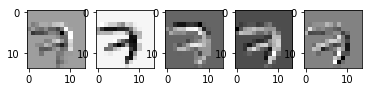

In [44]:
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
print('conv2d :', conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

pool : Tensor("MaxPool_2:0", shape=(1, 7, 7, 5), dtype=float32)


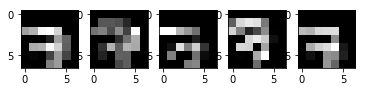

In [45]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME')
print('pool :', pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>